# Image Week - Day 1 - Exercice 2 - Gradient Descent

<a target="_blank" href="https://colab.research.google.com/github/leclairearthur/imageweek/blob/main/exo2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<br/><br/>

In this practical session, you have to complete the code regions marked ``### ... ###``.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
print(torch.__version__)

2.9.0+cpu


We will search for the minimum of the function $f : \mathbb{R}^2 \to \mathbb{R}$ displayed in the next cell.

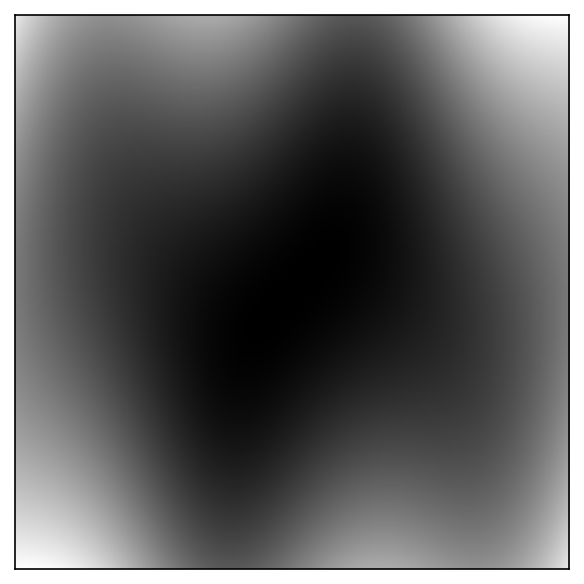

In [2]:
nr,nc = 256,256
a = 3
extent = ((-a-0.5/nc, a-0.5/nc, -a-0.5/nr, a-0.5/nr))
xs = np.linspace(a, -a, nr)
ys = np.linspace(-a, a, nc)
xm, ym = np.meshgrid(xs, ys, indexing='ij')
xm = xm.T
ym = ym.T

y = xm**2 + ym**2 - np.sin(xm*2)*ym
# other choices for fun:
#   y = np.sqrt(1+xm**2 + ym**2 - np.sin(xm*2)*ym)
#   y = 2*ym**2-np.cos(xm*3)*ym + 2*xm**2

fig = plt.figure(dpi=150)
plt.xticks([])
plt.yticks([])
plt.imshow(y,cmap = 'gray', extent=extent)
plt.show()

**QUESTION :** Define the function f (taking as input a tensor of shape (2)), and compute its gradient with Pytorch. Check the obtained values.

In [7]:
def f(x):
  xm, ym = x[0], x[1]
  y = xm**2 + ym**2 - torch.sin(xm*2)*ym
  return y


# compute the gradient of f at point (1,0)
x = torch.tensor([1. , 0. ], requires_grad=True)
fx = f(x)
fx.backward()
print(x.grad)

tensor([ 2.0000, -0.9093])


**QUESTION :** Implement the gradient descent (with fixed step size $\tau$). At each step, you compute the gradient by automatic differentiation ``backward()``.

Check the convergence result by plotting the values of $f$ along the iterates $(x_n)$.

If you are able to find the true solution $x_*$, you can also plot the error norm $\|x_n - x_*\|$.

/tmp/ipython-input-827319269.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xd[n,:] = x.detach()


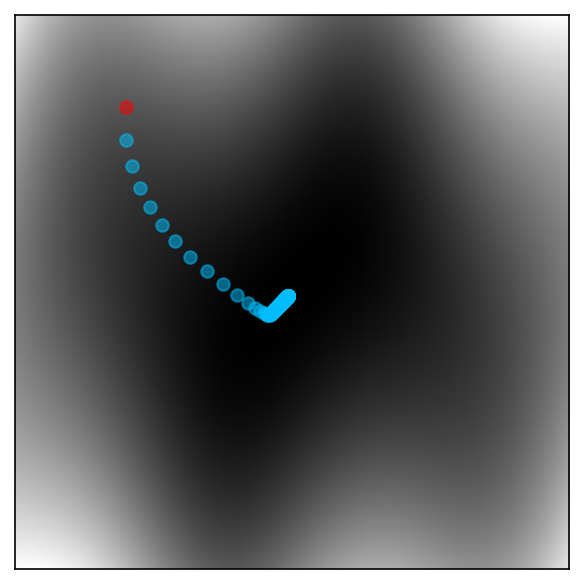

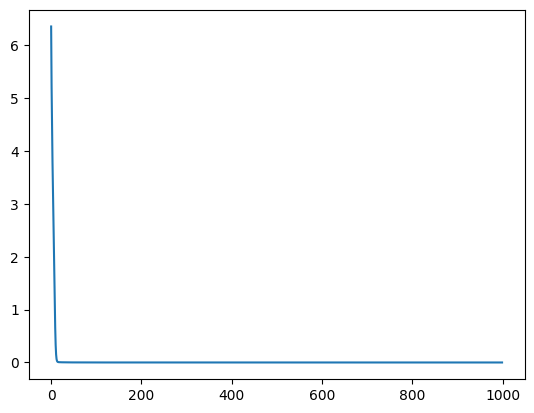

In [18]:
x0 = np.array([-1.8,2])   # initial point

tau = .1
N = 1000
xd = np.zeros((N,2))

fxlist = []

x = torch.tensor(x0, requires_grad=True)
for n in range(N):

    fx = f(x)
    fx.backward()
    with torch.no_grad():
      x -= tau*x.grad
    x.grad.zero_()
    xd[n,:] = x.detach()
    fxlist.append(fx.item())

fig = plt.figure(dpi=150)
plt.xticks([])
plt.yticks([])
plt.imshow(y,cmap = 'gray', extent=extent)
plt.scatter(x0[0], x0[1],c='red',alpha=.5)
plt.scatter(xd[:, 0], xd[:,1],c='deepskyblue',alpha=.5)
plt.show()

plt.figure(dpi=100)
plt.plot(fxlist)
plt.show()

**QUESTION:** Compare by doing gradient descent with the Pytorch routine ``torch.optim.SGD`` as follows.

In [20]:
x = torch.tensor(x0, requires_grad=True)
optim = torch.optim.SGD([x], lr=tau)
losslist = []
for it in range(N):
    loss = f(x)
    losslist.append(loss.item())
    optim.zero_grad()
    loss.backward()
    optim.step()

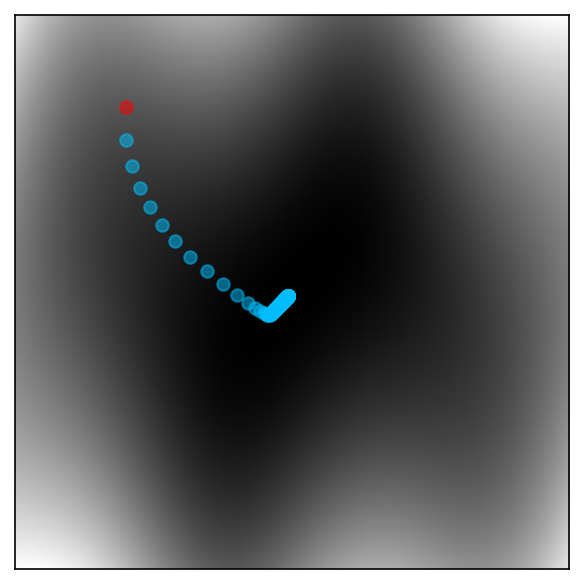

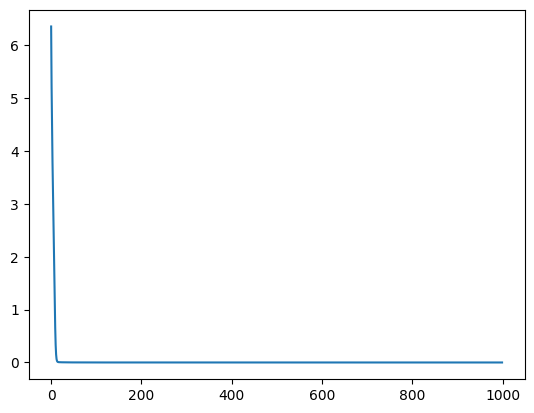

In [21]:
fig = plt.figure(dpi=150)
plt.xticks([])
plt.yticks([])
plt.imshow(y,cmap = 'gray', extent=extent)
plt.scatter(x0[0], x0[1],c='red',alpha=.5)
plt.scatter(xd[:, 0], xd[:,1],c='deepskyblue',alpha=.5)
plt.show()

plt.figure(dpi=100)
plt.plot(losslist)
plt.show()